### Importing necessary libraries

In [32]:
import numpy as np
from pywt import wavedec
import matplotlib.pyplot as plt
from networkx.drawing.nx_agraph import  graphviz_layout
import networkx as nx
import pandas as pd
import seaborn as sns

plt.rcParams['figure.figsize'] = [25, 20]     


def genData(param, show = False):
	a=[]
	if param[0]=="normal":
		mu, sigma, s = param[1],   param[2], param[3]
		a= np.random.normal(mu, sigma, size=s)
	elif param[0]=='uniform':
		mi, ma,s=param[1],   param[2], param[3]
		a= np.random.uniform(mi, ma, s)
	elif param[0]=="poisson":
		rate,s=param[1],   param[2]
		a = np.random.poisson(rate, s)
	if(show):
		count, bins, ignored = plt.hist(s, 14, density=True)
	return a

In [33]:
def genSample(signalCount):
    print("generate sample data")
    signals = [] 
    for i in range(signalCount):
        a = genData(["normal", 100,100,8])
        #print(a)
        sig = [] 
        for j in range(8):
            sig.append(int(a[j]))
        signals.append(sig)
    for i in range(signalCount):
        print(signals[i])
    return signals

In [34]:
def getSamplePredef():
    print("return sample data")
    signals = [[105, 220, 23, 99, 266, 190, 37, 5],
                [334, 174, 134, -7, 19, 155, 93, 89],
                [72, 96, 102, 151, -14, 171, 127, 127],
                [151, 38, 283, 204, 232, 141, 121, 47],
                [157, -60, 54, 54, 69, -27, -14, 101],
                [0, 113, 74, 176, 68, 322, 135, 367],
                [56, 114, 126, 181, 93, 41, 118, 76],
                [164, 200, 351, 51, 36, 163, 298, -5],
                [140, 124, 99, 34, -46, -5, 240, 136],
                [113, 58, 130, 123, 171, 143, 109, 17],
                [-8, 299, 65, 62, 130, 146, -43, 23],
                [-96, 212, 56, 150, -55, 150, 151, 70],
                [-22, 148, 219, 62, 108, 136, 198, 126],
                [220, 84, 165, 167, 1, 227, 15, 144],
                [0, 135, 165, 64, 100, 224, 244, 140],
                [211, 183, -161, 65, 33, 257, -16, 112]]
    return signals

In [35]:
def mergeList(input_data, verbose= False):
    if verbose:
        print("merge data")
    merged_list = []
    for l in input_data:
        merged_list += list(l)
    return merged_list

In [36]:
def listToPandasDF(input_data):
    df = pd.DataFrame(input_data)
    return df

In [37]:
def getWaveletCoefs(input_data):
    coefs = [] 
    for i in range(len(input_data)):
        girdi = np.array(input_data[i]) #np.array([1,2,3,4,5,6,7,8])*1
        coeff = wavedec(girdi, 'haar', level=int(np.log2(len(girdi))))
        coefs.append(mergeList(coeff))
    return coefs

In [38]:
def plotCorrelation(input_data_frame):
    Var_Corr = input_data_frame.corr()
    # plot the heatmap and annotation on it
    sns.heatmap(Var_Corr, xticklabels=Var_Corr.columns, yticklabels=Var_Corr.columns, annot=True)
    plt.show()
    # Basic correlogram
    sns_plot = sns.pairplot(input_data_frame)
    plt.show()

In [39]:
def generateOperationsSymbols(operations_count, symbol_list, Test = False, verbose= False):
    ops_ids=[]
    symbolSet = []
    
    for i in range(operations_count):
        if(verbose):print(i, end="\t")
        a = genData(["uniform", 0,10,4])    
        a= [int(x) for x in a]
        if(Test):
            a[3]=0
        go = True        
        #a=[4, 5, 9, -5]
        
        rez = 0
        if(int(a[1])%4==0   ): # operation is + 
            if ( a[0] + a[2] > 9 ):
                go = False
            else :
                rez = a[0] + a[2]
        elif(int(a[1])%4==1   ): # operation is -
            if a[0] < a[2]  :
                go = False                
            else :
                #print("here", a[0] - a[2] , a[0] > a[2])
                rez = a[0] - a[2]
        elif(int(a[1])%4==2   ): # operation is *
            if ( a[0] * a[2] >9  ):
                go = False
            else :                
                rez = a[0] * a[2]               
        elif(int(a[1])%4==3   ): # operation is -
            if ( a[2] ==0 ):                
                go = False
            else :
                rez = int(a[0] / a[2])
        #rint(go)  
        if go:
            if verbose : print(go , rez)
            a[3]=rez
            ops_ids.append(a)
            symbolSet.append(symbol_list[a[0]] )
            symbolSet.append(symbol_list[a[1]%4+10] )
            symbolSet.append(symbol_list[a[2]] )
            symbolSet.append(symbol_list[14] )
            if(not Test):
                symbolSet.append(symbol_list[a[3]] )
            else:
                symbolSet.append(symbol_list[15] )
    return ops_ids, symbolSet
            

In [40]:
def generateOperations(operations_count, Test = False, verbose= False):
    energy = 0 
    all=[]
    for i in range(operations_count):
        if(verbose):print(i, end="\t")
        a = genData(["uniform", 0,10,4])    
        a= [int(x) for x in a]
        if(True):#Test):
            a[3]=0
            
        all.append(a)
        #print(int(a[0]) , int(a[1])%4, int(a[2]) ,int(a[3])%2)
        if(int(a[1])%4==0 and int(a[3])%2 == 0  ):
            if(verbose):
                print(int(a[0]) , "+", int(a[2]) ,"=", int(a[0])  + int(a[2]))
        elif(int(a[1])%4==0 and int(a[3])%2 == 1 ):
            if(verbose):print(int(a[0]) , "+", int(a[2]) ,"= ?")
        elif(int(a[1])%4==1 and int(a[3])%2 == 0  ):
            if(int(a[2])<int(a[0])):
                if(verbose):print(int(a[0]) , "/", int(a[2]) ,"=", int(int(a[0])  - int(a[2])))
            else:
                if(verbose):print(int(a[0]) , "/", int(a[2]) ,"=", int(int(a[2])  - int(a[0])))          
        elif(int(a[1])%4==1 and int(a[3])%2 == 1  ):
            if(verbose):print(int(a[0]) , "-", int(a[2]) ,"= ?")        
        
        elif(int(a[1])%4==2 and int(a[3])%2 == 0  ):
            if(verbose):print(int(a[0]) , "*", int(a[2]) ,"=", int(a[0])  * int(a[2]))
        elif(int(a[1])%4==2 and int(a[3])%2 == 1 ):
            if(verbose):print(int(a[0]) , "*", int(a[2]) ,"= ?")
        
        elif(int(a[1])%4==3 and int(a[3])%2 == 0  ):
            if(int(a[2])!=0):
                if(verbose):print(int(a[0]) , "/", int(a[2]) ,"=", int(int(a[0])  / int(a[2])))
            elif(int(a[0])!=0):
                if(verbose):print(int(a[0]) , "/", int(a[2]) ,"=", int(int(a[2])  / int(a[0])))    
        
        elif(int(a[1])%4==3 and int(a[3])%2 == 1  ):
            if(verbose):print(int(a[0]) , "/", int(a[2]) ,"= ?")
    return all

In [41]:
def decodeOperations(all):
    for i in range(1):
        print(i, end="\t")
        a = all[i]
        #print(int(a[0]) , int(a[1])%4, int(a[2]) ,int(a[3])%2)
        if(int(a[1])%4==0 and int(a[3])%2 == 0  ):
            print(int(a[0]) , "+", int(a[2]) ,"=", int(a[0])  + int(a[2]))
        elif(int(a[1])%4==0 and int(a[3])%2 == 1 ):
            print(int(a[0]) , "+", int(a[2]) ,"= ?")
        elif(int(a[1])%4==1 and int(a[3])%2 == 0  ):
            if(int(a[2])<int(a[0])):
                print(int(a[0]) , "/", int(a[2]) ,"=", int(int(a[0])  - int(a[2])))
            else:
                print(int(a[0]) , "/", int(a[2]) ,"=", int(int(a[2])  - int(a[0])))          
        elif(int(a[1])%4==1 and int(a[3])%2 == 1  ):
            print(int(a[0]) , "-", int(a[2]) ,"= ?")        
        elif(int(a[1])%4==2 and int(a[3])%2 == 0  ):
            print(int(a[0]) , "*", int(a[2]) ,"=", int(a[0])  * int(a[2]))
        elif(int(a[1])%4==2 and int(a[3])%2 == 1 ):
            print(int(a[0]) , "*", int(a[2]) ,"= ?")
        elif(int(a[1])%4==3 and int(a[3])%2 == 0  ):
            if(int(a[2])>0):
                print(int(a[0]) , "/", int(a[2]) ,"=", int(int(a[0])  / int(a[2])))
            else:
                print(int(a[0]) , "/", int(a[2]) ,"=", int(int(a[2])  / int(a[0])))    
        elif(int(a[1])%4==3 and int(a[3])%2 == 1  ):
            print(int(a[0]) , "/", int(a[2]) ,"= ?")

In [42]:
def decodeTrainOperations(all):
    for i in range(len(all)):
        print(i, end="\t")
        a = all[i]
        
        if(int(a[1])%4==0   ):
            print(int(a[0]) , "+", int(a[2]) ,"=", int(a[0])  + int(a[2]))
       
        elif(int(a[1])%4==1  ):            
            print(int(a[0]) , "-", int(a[2]) ,"=", int(int(a[0])  - int(a[2])))            
        
        elif(int(a[1])%4==2   ):
            print(int(a[0]) , "*", int(a[2]) ,"=", int(a[0])  * int(a[2]))
                    
        elif(int(a[1])%4==3 ):            
            print(int(a[0]) , "/", int(a[2]) ,"=", int(int(a[0])  / int(a[2])))
           

In [43]:
def quantize(input_data, len_of_data, verbose = False):
    borders = [-200,-100,-50,0, 50, 100, 200]
    qsignals = [] 

    for i in range(len(input_data)):
        sig = [] 
        if(verbose):
            print(input_data[i])
        for j in range(int(len(input_data[i]))):
            output = 7
            for k in range(7):
                if( input_data[i][j] < borders[k]):
                    output = k
                    break
            if verbose:
                print(output, end = " ")
            sig.append(output)
        if verbose:
            print()
        qsignals.append(sig)
    return qsignals

In [44]:
def decodeOperationsDeeper(input_data, len_data, qsignals, verbose = False):
    inputs = [] 
    for i in range(len_data):

        if (verbose):print(i, end="\t")
        a = input_data[i]
        if(verbose):print(int(a[0]) , int(a[1])%4, int(a[2]) ,int(a[3])%2)

        if(int(a[1])%4==0 and int(a[3])%2 == 0  ):
            if(int(a[0])  + int(a[2]) < 10):
                if(verbose):
                    print( qsignals[int(a[0])] , "+", qsignals[int(a[2])] ,"=", qsignals[int(a[0])  + int(a[2])])            
                    print( qsignals[int(a[0])] , qsignals[10], qsignals[int(a[2])] ,"=", qsignals[int(a[0])  + int(a[2])])            
                inputs.append([ qsignals[int(a[0])] , qsignals[10], qsignals[int(a[2])] , qsignals[int(a[0])  + int(a[2])]])            
        elif(int(a[1])%4==0 and int(a[3])%2 == 1 ):
            if(verbose):
                print( qsignals[int(a[0])] , "+", qsignals[int(a[2])] ,"=", qsignals[14])
                print( qsignals[int(a[0])] , qsignals[10], qsignals[int(a[2])] ,"=", qsignals[14])
            inputs.append( [qsignals[int(a[0])] , qsignals[10], qsignals[int(a[2])] , qsignals[14]])

        elif(int(a[1])%4==1 and int(a[3])%2 == 0  ):
            if(int(a[2])<int(a[0])):
                if(verbose):
                    print( qsignals[int(a[0])] , "-", qsignals[int(a[2])] ,"=", qsignals[int(a[0])  - int(a[2])])
                    print( qsignals[int(a[0])] , qsignals[11], qsignals[int(a[2])] ,"=", qsignals[int(a[0])  - int(a[2])])
                inputs.append( [qsignals[int(a[0])] , qsignals[11], qsignals[int(a[2])] , qsignals[int(a[0])  - int(a[2])]])
            else:
                if(verbose):
                    print( qsignals[int(a[0])] , "-", qsignals[int(a[2])] ,"=", qsignals[int(a[2])  - int(a[0])])   
                    print( qsignals[int(a[0])] , qsignals[11], qsignals[int(a[2])] ,"=", qsignals[int(a[2])  - int(a[0])])   
                inputs.append( [qsignals[int(a[0])] , qsignals[11], qsignals[int(a[2])] , qsignals[int(a[2])  - int(a[0])]])

        elif(int(a[1])%4==1 and int(a[3])%2 == 1  ):
            if(verbose):
                print( qsignals[int(a[0])] , "-", qsignals[int(a[2])] ,"=", qsignals[14])
                print( qsignals[int(a[0])] , qsignals[11], qsignals[int(a[2])] ,"=", qsignals[14])
            inputs.append( [qsignals[int(a[0])] , qsignals[11], qsignals[int(a[2])] , qsignals[14]])        

        elif(int(a[1])%4==2 and int(a[3])%2 == 0  ):
            if(int(a[0])  * int(a[2]) < 10):
                if(verbose):
                    print( qsignals[int(a[0])] , "*", qsignals[int(a[2])] ,"=", qsignals[int(a[0])  * int(a[2])])
                    print( qsignals[int(a[0])] , qsignals[12], qsignals[int(a[2])] ,"=", qsignals[int(a[0])  * int(a[2])])
                inputs.append( [qsignals[int(a[0])] , qsignals[12], qsignals[int(a[2])] , qsignals[int(a[0])  * int(a[2])]])
        elif(int(a[1])%4==2 and int(a[3])%2 == 1 ):
            if(verbose):
                print( qsignals[int(a[0])] , "*", qsignals[int(a[2])] ,"=", qsignals[14])
                print( qsignals[int(a[0])] ,  qsignals[12], qsignals[int(a[2])] ,"=", qsignals[14])
            inputs.append( [qsignals[int(a[0])] ,  qsignals[12], qsignals[int(a[2])] , qsignals[14]])
        elif(int(a[1])%4==3 and int(a[3])%2 == 0  ):
            if(int(a[2])>0):            
                if(verbose):
                    print( qsignals[int(a[0])] , "/", qsignals[int(a[2])] ,"=", qsignals[int( int(a[0])  /int(a[2]))])
                    print( qsignals[int(a[0])] , qsignals[13], qsignals[int(a[2])] ,"=", qsignals[int(int(a[0])  /int(a[2]))])
                inputs.append( [qsignals[int(a[0])] , qsignals[13], qsignals[int(a[2])] , qsignals[ int(int(a[0])  /int(a[2]))]])

        elif(int(a[1])%4==3 and int(a[3])%2 == 1  ):
            if(verbose):
                print( qsignals[int(a[0])] , "/", qsignals[int(a[2])] ,"=", qsignals[14])
                print( qsignals[int(a[0])] , qsignals[13], qsignals[int(a[2])] ,"=", qsignals[14])
            inputs.append( [qsignals[int(a[0])] , qsignals[13], qsignals[int(a[2])] , qsignals[14]])
    return inputs




In [45]:
def initTree():
    GG=nx.DiGraph()    
    GG.add_node(0, value=999,occurance_count=1, id = -1,food =0)    
    return GG,1

In [46]:
def train_tree(input_data, GG, counter , WL, overlap):
    plt.rcParams.update({'font.size': 22})
    data1= input_data  
    #print(data1)
    poz = 0
    #print(len(data1)/WL)    
    step = WL-overlap

    for i in range(0,len(data1)-step+1, step):
        #if(data1[i:i+step]==[0,0,1,0] or  data1[i:i+step]==[1,0,0,0] ):
        #    //print(str(i)+ " food")
        poz=0
        for j in range(WL):
            # data
            d=data1[i + j]
            #print(d, end=' ')
            #print (d)
            # neighbours 
            nei= list(GG.neighbors(poz))       
            if len(nei)==0:
                #print (counter, poz, data1[i: i+step])
                GG.add_node(counter,value=d, occurance_count=1, id = -1,food =0)    
                GG.add_edge(poz,counter)
                poz=counter
                counter +=1
            else:
                k=-1
                for n in nei:
                    if(GG.node[n]['value']==d):
                        k=n
                        break
                if(k>=0):
                    poz=k
                    GG.node[k]['occurance_count'] = GG.node[k]['occurance_count'] + 1
                else:
                    GG.add_node(counter,value=d,occurance_count=1, id = -1,food =0)    
                    GG.add_edge(poz,counter)
                    poz=counter
                    counter += 1
    finalNodes = [] 
    for i in range(1, counter):
        yol =  nx.shortest_path(GG,0,i)
        if(len(yol) >WL):
            GG.node[yol[-1]]['id']=len(finalNodes)
            finalNodes.append(yol[-1])
    return GG, counter


In [47]:
def plotGraph(GG, WL, counter, short = False):
    plt.rcParams['figure.figsize'] = [15, 10]        
    labels=dict((n,d['value']) for n,d in GG.nodes(data=True))   
    #pos=nx.graphviz_layout(GG, prog='dot')
    pos =graphviz_layout(GG, prog='dot')
    #nx.spring_layout(GG)

    plt.title("node values")
    nx.draw_networkx(GG,  pos=pos, arrows=True, with_labels=True, labels=labels )
    plt.show()
    if( short):
        return
    plt.title("node ids")
    nx.draw_networkx(GG,  pos=pos, arrows=True, with_labels=True )
    plt.show()

    plt.title("node frequency")
    labels=dict((n,d['occurance_count']) for n,d in GG.nodes(data=True))   
    nx.draw_networkx(GG,  pos=pos, arrows=True, with_labels=True, labels=labels )
    plt.show()

    

    plt.title("final nodes ids")
    labels=dict((n,d['id']) for n,d in GG.nodes(data=True))   
    nx.draw_networkx(GG,  pos=pos, arrows=True, with_labels=True, labels=labels )
    plt.show()    

In [48]:
def getBranchId(branch,GG, counter , WL, overlap):    
    ids = []
    plt.rcParams.update({'font.size': 22})
    data1= branch  
    #print (data1)
    poz = 0
    #print(len(data1)/WL)    
    step = WL-overlap
    
    for i in range(0,len(data1)-step+1, step):
        k=0
        poz=0
        #print()
        for j in range(WL):
            # data
            d=data1[i + j]
            
            # neighbours 
            nei= list(GG.neighbors(poz))       
            if len(nei)==0:
                k=-1
                break
            else:
                k=-1
                for n in nei:
                    if(GG.node[n]['value']==d):
                        k=n
                        break
                if(k>=0):
                    poz=k                    
                    #GG.node[k]['occurance_count'] = GG.node[k]['occurance_count'] + 1
                else:
                    k=-1
                    break
        #ids.append(k)
        
        #ids.append(GG.node[k]['id'])
        if(k>0):
            ids.append(GG.node[k]['id'])
        else:
            ids.append(-1)
    return ids


In [49]:
def getBranchGivenStartNodeValue(startNodeValue,GG, counter , WL, overlap):    
    data = [] 
    nei= list(GG.neighbors(0))      
    #print(nei)
    k=-1
    for n in nei:
        if(GG.node[n]['value']==startNodeValue):
            k=n
            break
    #print(k)
    #data.append(k)
    
    while(k>=0):
        nei= list(GG.neighbors(k))    
        if len(nei)==0:
            k=-1
        else:
            k=nei[0]
            data.append(GG.node[k]['value'])
    return data


In [50]:
def checkBranch(branch,GG, counter , WL, overlap):    
    ids = []
    plt.rcParams.update({'font.size': 22})
    data1= branch  
    #print (data1)
    poz = 0
    #print(len(data1)/WL)    
    step = WL-overlap
    
    for i in range(0,len(data1)-step+1, step):
        k=0
        poz=0
        #print()
        j=0
        # data
        d=data1[i + j]

        # neighbours 
        nei= list(GG.neighbors(poz))       
        if len(nei)==0:
            k=-1
            break
        else:
            k=-1
            for n in nei:
                if(GG.node[n]['value']==d):
                    k=n
                    break
            if(k>=0):
                poz=k                    
                #GG.node[k]['occurance_count'] = GG.node[k]['occurance_count'] + 1
            else:
                k=-1
                break
        #ids.append(k)
        
        #ids.append(GG.node[k]['id'])
        if(k>0):
            ids.append(GG.node[k]['value'])
        else:
            ids.append(-1)
    return ids

In [51]:
def buildAbstractTree(GG, symbols, ops,counter):
    #print(b)
    decodedOps=decodeOperationsDeeper(input_data=ops,len_data=20, qsignals= quantize(symbols,len_of_data=4) )
    
    GG,counter = train_tree( mergeList(mergeList(decodedOps)), GG, counter , WL, overlap)
    plotGraph(GG,WL,counter)
    return GG, counter


In [52]:
def addBranches(GG,ops,counter,WL, overlap=0, doPlot = False):    
    GG,counter = train_tree( (mergeList(ops)), GG, counter , WL, overlap)
    if doPlot:
        plotGraph(GG,WL,counter)
    return GG, counter

In [53]:
def buildContextTree(GG, ops,counter,WL, overlap=0):
    #print(b)
    #decodedOps=decodeOperationsDeeper(input_data=ops,len_data=20, qsignals= quantize(symbols,len_of_data=4) )
    
    GG,counter = train_tree( ops, GG, counter , WL, overlap)
    plotGraph(GG,WL,counter)
    return GG, counter

# Build the system

## Generate Symbols randomly (only one time run )

In [54]:
symbols= genSample(16)
wsymbols= ( getWaveletCoefs(symbols))
print()
for i in range(len(wsymbols)):
    #print(symbols[i])
    print(i,[ int(j) for j in wsymbols[i]])
#a= getSamplePredef()


generate sample data
[135, 87, 32, 134, 74, 87, 197, 123]
[147, -43, 49, 261, 96, 175, 92, 87]
[210, 11, 53, 233, -18, 63, 177, 127]
[286, 37, 226, 179, -55, 96, 122, 87]
[25, 100, 194, 71, 83, 87, 118, 131]
[37, 8, 200, 2, -160, 166, -42, 254]
[140, 183, 241, 204, -42, 76, 150, 17]
[128, 28, 201, 145, -63, 128, 133, -7]
[205, 168, 52, -11, 137, -92, 149, 107]
[127, 54, 113, 53, 181, 236, 88, 4]
[127, -39, 301, 239, 186, 164, 112, 52]
[-7, 69, 141, 157, 53, 125, -123, 115]
[57, 254, 130, 56, 18, 79, 73, 92]
[234, 5, 320, 126, 93, 221, 171, 58]
[314, -17, 162, 140, 229, 106, 132, 119]
[191, 127, 259, 96, -83, 94, 2, 65]

0 [307, -32, 28, -79, 33, -72, -9, 52]
1 [305, -12, -103, 46, 134, -149, -55, 3]
2 [302, 55, -32, -129, 140, -127, -57, 35]
3 [345, 168, -41, -84, 176, 33, -106, 24]
4 [286, -10, -70, -39, -53, 86, -2, -9]
5 [164, 10, -78, -103, 20, 140, -230, -209]
6 [342, 200, -61, -66, -30, 26, -83, 94]
7 [245, 109, -95, -30, 70, 39, -135, 98]
8 [252, 39, 166, -105, 26, 44, 161, 29]


## Generate operations 

In [55]:
verbose = True
op_count = 2
symbols_correspondence = ["0","1","2","3","4","5","6","7","8","9","+", "-","*", "/","=","?"]
if (verbose):
    print("symbols")
    [print(i, symbols_correspondence[i], symbols[i]) for i in range(len(symbols))]
    print()
    
a,b=generateOperationsSymbols(op_count, symbols, False, False)

if (verbose): 
    print("operations encoded ")
    [print(i, a[i]) for i in range(len(a))]
    print() 
    print("operations")
    decodeTrainOperations(a)
    print("operation symbols")
    [print(i, b[i]) for i in range(len(b))]
    print()

c= ( getWaveletCoefs(b))
if (verbose): 
    print("wavelet symbols")
    [print(i, c[i]) for i in range(len(c))]
    
    print()
d=quantize(c,len_of_data=4)

if (verbose): 
    print("quantized wavelet symbols")
    [print(i, d[i]) for i in range(len(d))]

symbols
0 0 [135, 87, 32, 134, 74, 87, 197, 123]
1 1 [147, -43, 49, 261, 96, 175, 92, 87]
2 2 [210, 11, 53, 233, -18, 63, 177, 127]
3 3 [286, 37, 226, 179, -55, 96, 122, 87]
4 4 [25, 100, 194, 71, 83, 87, 118, 131]
5 5 [37, 8, 200, 2, -160, 166, -42, 254]
6 6 [140, 183, 241, 204, -42, 76, 150, 17]
7 7 [128, 28, 201, 145, -63, 128, 133, -7]
8 8 [205, 168, 52, -11, 137, -92, 149, 107]
9 9 [127, 54, 113, 53, 181, 236, 88, 4]
10 + [127, -39, 301, 239, 186, 164, 112, 52]
11 - [-7, 69, 141, 157, 53, 125, -123, 115]
12 * [57, 254, 130, 56, 18, 79, 73, 92]
13 / [234, 5, 320, 126, 93, 221, 171, 58]
14 = [314, -17, 162, 140, 229, 106, 132, 119]
15 ? [191, 127, 259, 96, -83, 94, 2, 65]

operations encoded 
0 [9, 7, 8, 1]

operations
0	9 / 8 = 1
operation symbols
0 [127, 54, 113, 53, 181, 236, 88, 4]
1 [234, 5, 320, 126, 93, 221, 171, 58]
2 [205, 168, 52, -11, 137, -92, 149, 107]
3 [314, -17, 162, 140, 229, 106, 132, 119]
4 [147, -43, 49, 261, 96, 175, 92, 87]

wavelet symbols
0 [302.6417023478424

## Initialize the components

In [56]:
#GG= initTree()
WLabstract = 8 # window length
overlap = 0# int(WL/5)
AbstractTree,counterAbstract = initTree()
ContextTree,counterContext = initTree()
ActuatorTree,counterActuator = initTree()
#stepByStep1()

In [57]:
print(d)
branchID=0
getBranchId(d[branchID],AbstractTree, counterAbstract , WL=8, overlap=0)


[[7, 2, 4, 6, 5, 4, 3, 5], [7, 5, 1, 4, 6, 6, 2, 5], [7, 4, 6, 1, 4, 4, 6, 4], [7, 4, 3, 4, 7, 4, 5, 4], [7, 3, 1, 4, 6, 1, 2, 4]]


[-1]

In [58]:
addBranch = True
for branchID in range(2) : #range(len(d)):    
    #branchID=1
    if addBranch:
        AbstractTree,counterAbstract = addBranches(AbstractTree,[d[branchID]],counterAbstract,WL=8, overlap=0, doPlot=False)

    abid= getBranchId(d[branchID],AbstractTree, counterAbstract , WL=8, overlap=0)

    if addBranch:
        ContextTree,counterContext = addBranches(ContextTree,[abid],counterContext,WL=1, overlap=0, doPlot=False)
    cbid= getBranchId(abid,ContextTree, counterContext , WL=1, overlap=0)
    
    foundNode = checkBranch(cbid,ActuatorTree, counterContext , WL=1, overlap=0)
    if len(foundNode) ==0:
        sample_sound= mergeList( [cbid, (genSample(1)[0])])
        ActuatorTree,counterActuator = addBranches(ActuatorTree, [sample_sound] ,counterActuator,WL=9, overlap=0, doPlot=False)
    else:
        print("node exists in actuator, check error")
        #print(b)
        #print()
        

    print ("input data ",d[branchID])
    print("abstract branch id = " , abid)
    print("context branch id = " , cbid)
    print()
print("ABSTRACT")
plotGraph(AbstractTree,8, counterAbstract, short = True)
print("CONTEXT")
plotGraph(ContextTree,1, counterContext, short = True)
print("ACTUATOR")
plotGraph(ActuatorTree,1, counterActuator, short = True)



generate sample data
[177, -95, 160, 69, 38, 116, 37, 256]
input data  [7, 2, 4, 6, 5, 4, 3, 5]
abstract branch id =  [0]
context branch id =  [0]

generate sample data
[96, 69, 32, 13, 140, 211, 96, -91]
input data  [7, 5, 1, 4, 6, 6, 2, 5]
abstract branch id =  [1]
context branch id =  [1]

ABSTRACT


ImportError: ('requires pygraphviz ', 'http://pygraphviz.github.io/')

In [59]:
#print (checkBranch(d[branchID],AbstractTree, counterAbstract , WL=8, overlap=0))
#checkBranch([1],ContextTree, counterContext , WL=1, overlap=0)
#foundNode
checkBranch([1],ActuatorTree, counterActuator , WL=1, overlap=0)
brach =[65, 205, 45, 86, 151, 121, 183, 94]

getBranchGivenStartNodeValue(0, ActuatorTree, counterActuator , 9, 0)


[177, -95, 160, 69, 38, 116, 37, 256]

In [64]:
def trainOneStep(data):
    for branchID in range(2) : #range(len(d)):    
    #branchID=1
        if addBranch:
            AbstractTree,counterAbstract = addBranches(AbstractTree,[d[branchID]],counterAbstract,WL=8, overlap=0, doPlot=False)
trainOneStep()


TypeError: trainOneStep() missing 1 required positional argument: 'data'

In [65]:
#GG= initTree()
WL = 8 # window length
overlap = 0# int(WL/5)
GG,counter = initTree()


ops=generateOperations(100)
print(ops)
GG,counter = buildAbstractTree(, symbols, ops, counter)
#print(GG.node[0])
#print(counter)

SyntaxError: invalid syntax (<ipython-input-65-4619ff62bfc1>, line 9)



plt.title("samples in time domain")
plt.plot(np.array(a).T)
plt.show()

plt.title("samples in wavelet domain")
plt.plot(np.array(aa).T)
plt.show()

plt.title("samples in time domain")
plotCorrelation(listToPandasDF(np.array(a).T))
plt.show()
plt.title("samples in wavelet domain")
plotCorrelation(listToPandasDF(np.array(aa).T))
for j in range(len(aa)):
    print([int(i) for i in aa[j]])


# test the abstract with some operations

In [21]:
WL = 4 # window length
overlap = 0# int(WL/5)
GG1,counter1 = initTree()

In [22]:
ops=generateOperations(500, Test=False,verbose = False)

0	9 + 7 = 16
1	4 / 8 = 0
2	1 + 6 = 7
3	9 / 3 = 6
4	7 / 4 = 1
5	9 / 3 = 3
6	5 * 2 = 10
7	8 / 1 = 8
8	1 + 2 = 3
9	5 / 6 = 1
10	6 + 3 = 9
11	0 + 8 = 8
12	5 / 2 = 3
13	4 / 7 = 3
14	3 * 0 = 0
15	5 * 8 = 40
16	0 / 6 = 6
17	0 + 0 = 0
18	4 / 1 = 4
19	8 / 8 = 0
20	8 + 9 = 17
21	5 * 4 = 20
22	6 / 4 = 1
23	7 * 8 = 56
24	5 + 1 = 6
25	9 / 0 = 9
26	9 / 5 = 4
27	8 + 5 = 13
28	8 + 6 = 14
29	3 / 9 = 0
30	9 + 6 = 15
31	6 + 3 = 9
32	6 * 5 = 30
33	0 + 0 = 0
34	7 / 5 = 2
35	5 + 3 = 8
36	8 + 8 = 16
37	7 / 1 = 6
38	0 + 0 = 0
39	4 + 6 = 10
40	7 / 2 = 3
41	6 * 5 = 30
42	1 / 1 = 0
43	3 * 2 = 6
44	45	8 * 4 = 32
46	3 / 5 = 0
47	8 + 4 = 12
48	8 / 7 = 1
49	1 / 2 = 1
50	2 * 9 = 18
51	4 / 4 = 0
52	1 / 2 = 1
53	8 * 6 = 48
54	1 + 5 = 6
55	6 / 4 = 2
56	7 + 6 = 13
57	5 + 5 = 10
58	5 + 4 = 9
59	0 / 1 = 1
60	5 + 6 = 11
61	2 / 4 = 2
62	0 * 6 = 0
63	4 + 1 = 5
64	8 / 1 = 7
65	0 * 8 = 0
66	0 + 9 = 9
67	0 * 9 = 0
68	2 / 5 = 0
69	7 * 7 = 49
70	3 / 8 = 5
71	6 * 2 = 12
72	4 / 3 = 1
73	4 * 3 = 12
74	5 + 8 = 13
75	7 / 5 = 2
76	77	5 

In [43]:
ops=generateOperations(500, Test=False,verbose = True)
#print((ops))

decodedOps=decodeOperationsDeeper(input_data=ops,len_data=len(ops), qsignals= quantize(symbols,len_of_data=4) )
    
#GG,counter = train_tree( mergeList(mergeList(decodedOps)), GG, counter , WL, overlap)
#print(decodedOps)

ids = getBranchId(mergeList(mergeList(decodedOps)),GG, counter,8, overlap)

print(ids)
ops= mergeList(ops)


0	0 + 1 = 1
1	4 * 0 = 0
2	3 / 2 = 1
3	6 / 8 = 2
4	5 / 5 = 1
[5, 8, 4, 4, 3, 7, 5, 5, 9, 1, 10, 4, 11, 1, 6, 10, 2, -1, 2, 4]


In [22]:
ids1 = getBranchId([6, 8, 7, 6, 0, 1, 6, 0, 2, 9, 10, 2, 0, 1, 2, 3, 10, 1, 6, 10],GG1, counter1,4, overlap)
print(ids1)

[-1, -1, -1, -1, -1]


[0, 4, 1, 0, 4, 2, 0, 0, 3, 9, 2, 0, 6, 9, 8, 0, 5, 7, 5, 0]
[[0, 0, 1, 4], [0, 0, 2, 4], [0, 2, 3, 9], [0, 6, 8, 9], [0, 5, 5, 7]]
[[0, 0, 1, 4], [0, 0, 2, 4], [0, 2, 3, 9], [0, 6, 8, 9], [0, 5, 5, 7]]


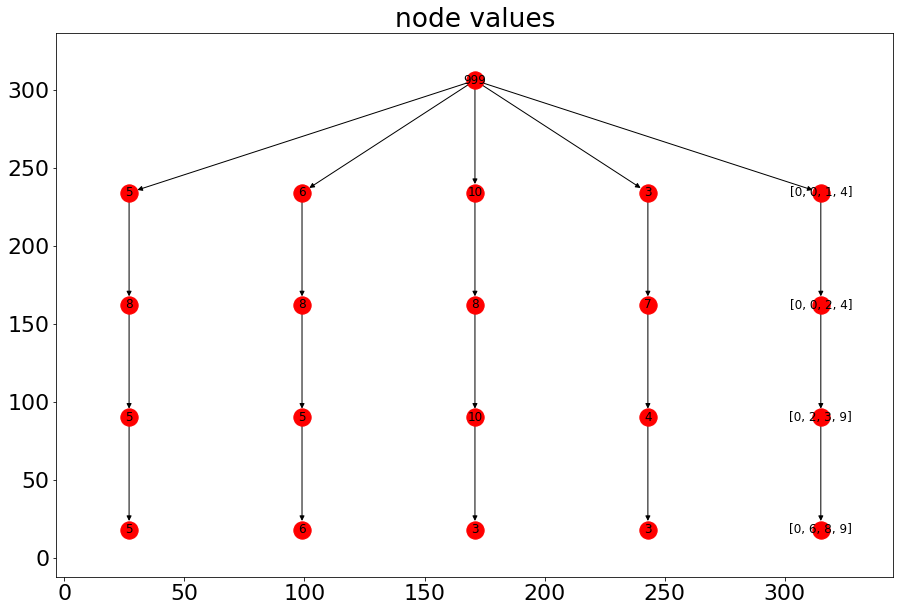

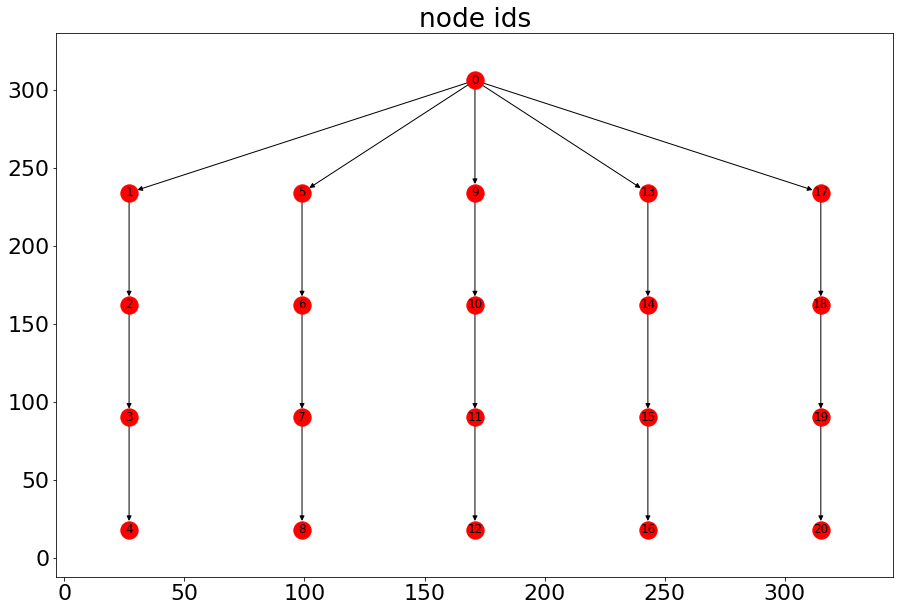

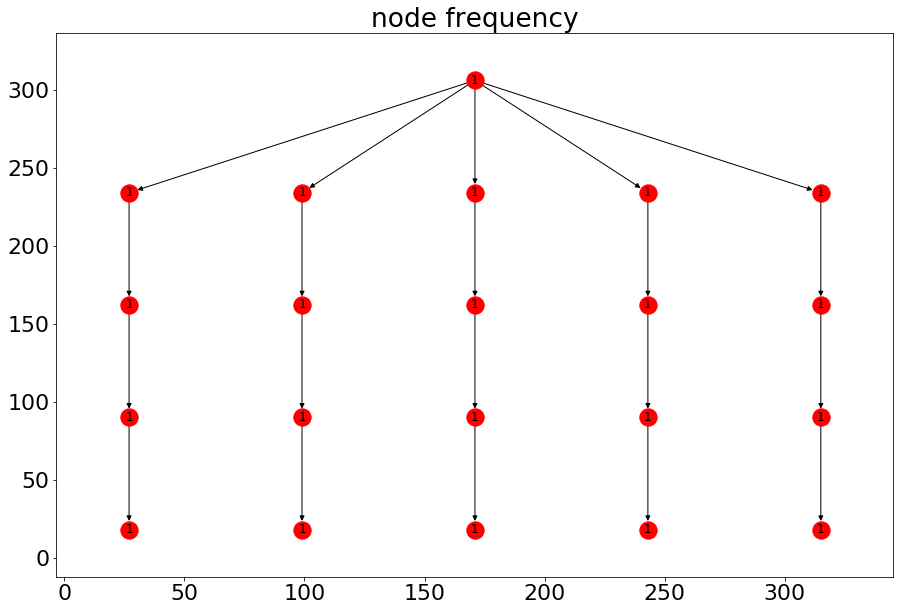

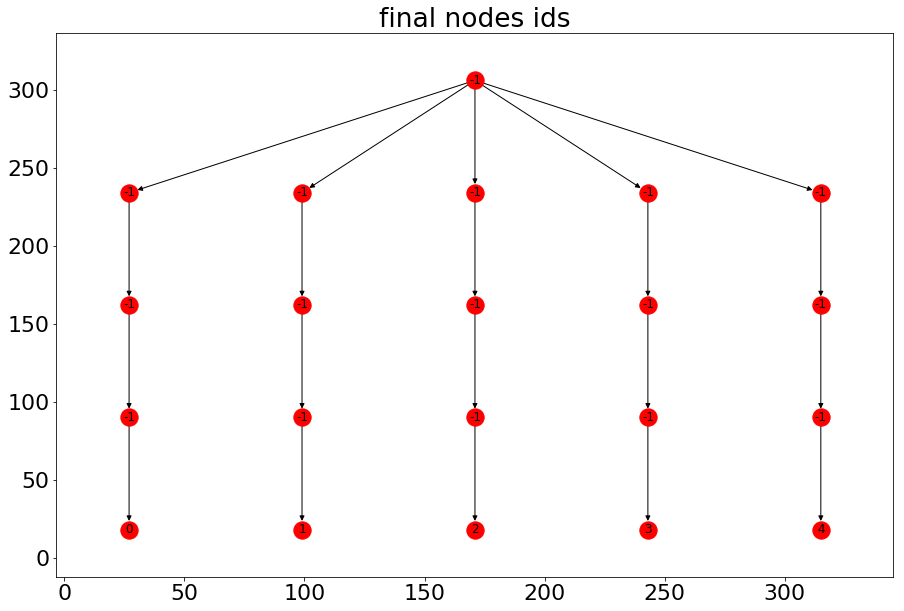

In [47]:
WL=4

#
print(ops)

b=[]
for i in range(int(len(ops)/WL)):
    c= ops[i*WL:(i+1)*WL]   
    c.sort()    
    b.append(c)
    
print(b)
GG1,counter1 = buildContextTree(GG1, b, counter1,WL)

In [48]:
ops=generateOperations(5, Test=False,verbose = True)
#print((ops))

decodedOps=decodeOperationsDeeper(input_data=ops,len_data=len(ops), qsignals= quantize(symbols,len_of_data=4) )
    
#GG,counter = train_tree( mergeList(mergeList(decodedOps)), GG, counter , WL, overlap)
#print(decodedOps)

ids2 = getBranchId(mergeList(mergeList(decodedOps)),GG, counter,8, overlap)


print(ids)
ops= mergeList(ops)

ids1 = getBranchId(ids2,GG1, counter1,4, overlap)
print(ids1)


0	6 / 4 = 1
1	6 / 4 = 2
2	0 / 0 = 0
3	0 * 2 = 0
4	9 * 1 = 9
[5, 8, 4, 4, 3, 7, 5, 5, 9, 1, 10, 4, 11, 1, 6, 10, 2, -1, 2, 4]
[-1, -1, -1, -1, -1]


In [ ]:
WL=4

#
print(ops)

b=[]
for i in range(int(len(ops)/WL)):
    c= ops[i*WL:(i+1)*WL]   
    c.sort()    
    b.append(c)
    
print(b)

# Test functions

In [24]:
ops=generateOperations(5)
print()
print()
print("ops = ", ops)
print()
print()
#decodedOps=decodeOperationsDeeper(input_data=ops,len_data=len(ops), qsignals= quantize(symbols,len_of_data=4) )
print()
print()


#print(decodedOps)

0	2 + 9 = ?
1	7 + 8 = 15
2	2 / 5 = ?
3	0 - 2 = ?
4	3 / 5 = 0


ops =  [[2, 8, 9, 7], [7, 0, 8, 8], [2, 3, 5, 7], [0, 1, 2, 5], [3, 3, 5, 8]]






In [48]:
symbols= genSample(16)
wsymbols = getWaveletCoefs(symbols)
print()
for i in range(len(wsymbols)):
    print(i,wsymbols[i])
qsymbols = quantize(wsymbols)
print()
for i in range(len(qsymbols)):
    print(i,qsymbols[i])

generate sample data
[64, -3, 187, 26, 91, 201, 198, 143]
[115, 68, 2, 154, 71, -57, 214, -61]
[125, -48, 145, 168, 215, 20, 96, 230]
[147, 62, -18, 63, 107, 67, 1, -65]
[95, 145, 122, -36, 172, 56, 252, 40]
[58, 151, -49, 7, -13, 185, 18, 193]
[45, -38, 6, 70, 168, 76, 119, 122]
[63, 42, 193, 223, 153, 42, 343, 143]
[187, 120, 66, 37, -63, 84, 32, 93]
[213, 60, 322, 29, 372, 110, 359, 90]
[134, 74, 207, -1, 88, 158, 119, 198]
[109, -12, 53, 160, -46, 179, -32, 114]
[381, 103, 169, 94, 298, -84, 61, 41]
[-17, 161, 35, 28, -17, 66, -14, 55]
[16, 102, 36, 45, 214, 124, 21, -23]
[181, 23, 77, 103, 179, -150, -61, 169]

0 [320.6729252680994, -126.9256672229853, -76.00000000000003, -24.5, 47.37615433949869, 113.84419177103416, -77.78174593052023, 38.89087296526013]
1 [178.89801564019658, 60.81118318204313, 13.500000000000014, -69.5, 33.23401871576773, -107.48023074035524, 90.50966799187809, 194.45436482630058]
2 [336.22927445420345, -60.45762979144985, -118.00000000000003, -45.5000000000000

In [35]:
for i in range(2):
    for j in range(4):
        print(ops[i][j], end = "")
    print()
    

2897
7088


In [55]:
for i in range(len(symbols)):
    for j in range():
        
nosySymbols= symbols

In [57]:
print(nosySymbols+3)

TypeError: can only concatenate list (not "int") to list

In [54]:
decodeOpes(ops,2,qsymbols)

0	2 0 9 1
[6, 2, 1, 3, 6, 3, 6, 2] + [6, 1, 3, 4, 6, 6, 6, 6] = [6, 3, 4, 6, 2, 3, 5, 4]
[6, 2, 1, 3, 6, 3, 6, 2] [6, 2, 4, 3, 4, 6, 3, 2] [6, 1, 3, 4, 6, 6, 6, 6] = [6, 3, 4, 6, 2, 3, 5, 4]
1	7 0 8 0


[[[6, 2, 1, 3, 6, 3, 6, 2],
  [6, 2, 4, 3, 4, 6, 3, 2],
  [6, 1, 3, 4, 6, 6, 6, 6],
  [6, 3, 4, 6, 2, 3, 5, 4]]]

In [40]:
a= [4,3,2,1, 5,4,3,2,]

b=[]
for i in range(2):
    c= a[i*4:(i+1)*4]   
    c.sort()    
    b.append(c)
b=mergeList(b)
print(a)
print(b)

[4, 3, 2, 1, 5, 4, 3, 2]
[1, 2, 3, 4, 2, 3, 4, 5]
